In [1]:
import numpy as  np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
titanic_data = pd.read_csv("data/train.csv")

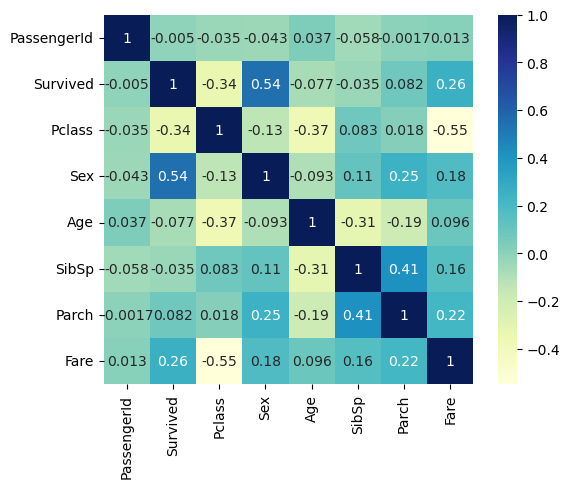

In [3]:
import seaborn as sns
titanic_data['Sex'] = titanic_data['Sex'].map({'male':0,'female':1})

numeric_data = titanic_data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), cmap = "YlGnBu", annot = True, square = True)
plt.show()

In [4]:
#creating numpy arrays for the x and y training sets
#using only the required fields for x {sex, parch, fare}

requ_x = ['Sex','Parch','Fare']
requ_y = ['Survived']
required_data_x = titanic_data[requ_x]
required_data_y = titanic_data[requ_y]

In [5]:
# we need to deal with sex , sibsp, fare
X_train = required_data_x.to_numpy()
y_train = required_data_y.to_numpy()

In [6]:
def sigmoid(z):
    g_z = 1/(1+np.exp(-z))
    return g_z

In [7]:
def compute_cost(X,y,w,b):
    """ 
    w - is an array of parameters
    b - is one parameter
    X - is an array of training inputs
    y - is an array of training outputs
    """
    m = X.shape[0]
    cost = 0
    for i in range(m):
        z = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z)
        cost += -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
    cost= cost/(2*m)
    return cost

In [8]:
def compute_gradient(X,y,w,b):
    """
    m - number of inputs
    n - the number of features
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0

    for i in range(m):
        z = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z)
        error = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + error * X[i][j]
        dj_db = dj_db + error

    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_dw,dj_db 

In [9]:
def gradient_descent(X,y,w_in,b_in,num_iters,alpha):
    """ num_iters - the number of iterations 
    w_in - an array of parameters
    b_in - an array of parameters
    """
    J_history = []

    w = w_in
    b = b_in
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(X,y,w,b)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        J_history.append(compute_cost(X,y,w,b))
            
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}  ,w :{w}, b : {b} ")
    
    return w, b, J_history

In [10]:
n = X_train.shape[1]
w_in = np.zeros((n))
b_in = 0
my_test = gradient_descent(X_train,y_train,w_in,b_in,100000,0.001)

C:\Users\kulek\AppData\Local\Temp\ipykernel_9848\2417136886.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j] = dj_dw[j] + error * X[i][j]


Iteration    0: Cost [0.34481432]   
Iteration 10000: Cost [0.28304549]   
Iteration 20000: Cost [0.26275362]   
Iteration 30000: Cost [0.25388784]   
Iteration 40000: Cost [0.2496997]   
Iteration 50000: Cost [0.24762174]   
Iteration 60000: Cost [0.24655416]   
Iteration 70000: Cost [0.24599164]   
Iteration 80000: Cost [0.24568975]   
Iteration 90000: Cost [0.24552554]   


In [17]:
w_out = my_test[0]
b_out = my_test[1]

In [36]:
#Testing the learning algorithm
test_data = pd.read_csv("data/test.csv")

In [41]:
test_data['Sex'] = test_data['Sex'].map({'male':0,'female':1})

In [44]:
req_x_test = ['Sex','Parch','Fare']
x_test = test_data[req_x_test].to_numpy()

array([[ 0.    ,  0.    ,  7.8292],
       [ 1.    ,  0.    ,  7.    ],
       [ 0.    ,  0.    ,  9.6875],
       ...,
       [ 0.    ,  0.    ,  7.25  ],
       [ 0.    ,  0.    ,  8.05  ],
       [ 0.    ,  1.    , 22.3583]])

In [48]:
test_data[:10]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,NaN,S


In [38]:
def test_algo(X,w,b):
    m = X.shape[0]
    result = np.ones((m,))
    for i in range(m):
        f_wb = sigmoid(np.dot(X[i],w) + b)
        result[i] = f_wb
    return result

In [46]:
my_predictions = test_algo(x_test, w_out, b_out)

C:\Users\kulek\AppData\Local\Temp\ipykernel_9848\3230361701.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result[i] = f_wb


In [49]:
my_predictions[:10]

array([0.16864368, 0.70091017, 0.17200452, 0.17014423, 0.6484084 ,
       0.17116314, 0.7025956 , 0.16361502, 0.70152476, 0.199985  ])